In [1]:
push!(LOAD_PATH, "/home/amir/Work/gdmrg")
import Tmp

In [14]:
reload("Tmp")
include("test.jl")

Test Passed

In [17]:
Lx = 14
H = Tmp.heisenberg(Lx)
eheis, vheis = eigs(H, nev=1, which=:SR)

([-6.02672], [-1.18625e-16; 3.06195e-17; … ; -8.19776e-17; 1.78801e-16], 1, 7, 80, [0.110142, -0.0457816, -0.0198396, 0.0418904, -0.00249078, 0.0129999, 0.0253311, 0.0694832, 0.0165932, 0.0390768  …  0.0483705, 0.0470794, -0.0500754, 0.0657998, 0.0777107, 0.0476454, 0.0165287, 0.0564652, 0.050496, -0.162994])

In [18]:
mps = Tmp.MPS(Lx, 2, vheis[:,1])
@show mps.dims
mpo = Tmp.MPO{Float64}(Lx, 2)

sz = Float64[0.5 0; 0 -0.5]
@show Tmp.measure(mps, mpo) ≈ eheis
@show Tmp.measure(mps, sz, 1)
@show Tmp.measure(mps, sz, collect(1:Lx))
correlations = Float64[]
for i=1:Lx-1
    for j=i+1:Lx
        push!(correlations, Tmp.measure(mps, [sz,sz], [i,j])[1,1])
    end
end

mps.dims = [1, 2, 4, 8, 16, 32, 64, 128, 64, 32, 16, 8, 4, 2, 1]
Tmp.measure(mps, mpo) ≈ eheis = true
Tmp.measure(mps, sz, 1) = [8.56953e-16]
Tmp.measure(mps, sz, collect(1:Lx)) = Array{Float64,2}[[8.56953e-16], [-6.93889e-16], [5.10009e-16], [2.77556e-17], [-4.80171e-15], [4.2813e-15], [-1.48145e-15], [2.86576e-15], [5.48173e-16], [-1.46411e-15], [2.28983e-15], [-2.83107e-15], [1.4988e-15], [-1.55431e-15]]



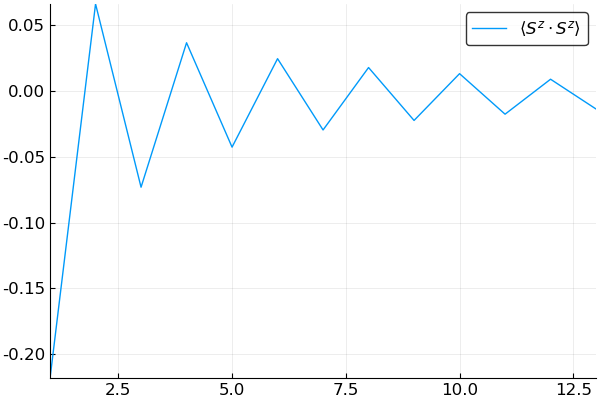

In [19]:
using Plots
using LaTeXStrings
font = Plots.font("Helvetica", 12)
pyplot(guidefont=font, xtickfont=font, ytickfont=font, legendfont=font)

plot(correlations[1:Lx-1], label=L"$\langle S^z \cdot S^z \rangle$")


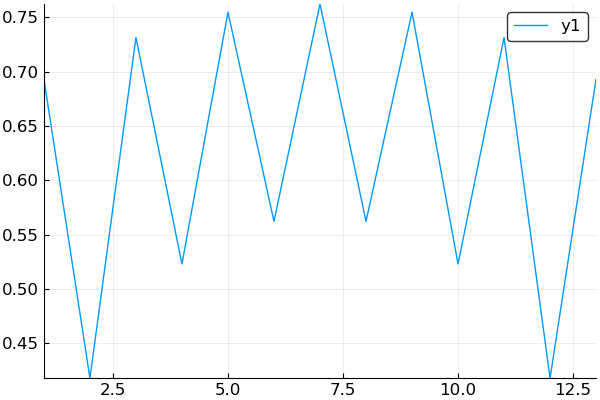

In [20]:
vnes = Tmp.entropy(Tmp.entanglements!(mps))
plot(vnes)

before ≈ after = true



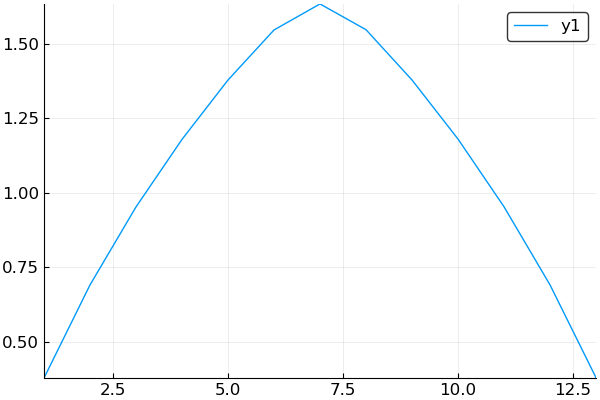

In [21]:
srand(0)
reload("Tmp")
# TODO:
# test canonicaize to right and left
# and center_at (how?)
Lx = 14
d = 2
randmps = Tmp.MPS(Lx, d, normalize(rand(Complex128, d^Lx)))
#Tmp.display_matrices(mps,3:4)
before=Tmp.mps2ketstate(randmps)

#@show 
ents = Tmp.entanglements!(randmps)

#@show
Tmp.move_center!(randmps, 3)

# @show ents = Tmp.entanglements!(mps)

# @show Tmp.move_center!(mps, 2)

# @show ents = Tmp.entanglements!(mps)

# @show Tmp.move_center!(mps, 1)

# @show ents = Tmp.entanglements!(mps)

# @show Tmp.move_center!(mps, 4)

# @show ents = Tmp.entanglements!(mps)

after=Tmp.mps2ketstate(randmps)

@show before ≈ after
vnes = Tmp.entropy(Tmp.entanglements!(randmps))
plot(vnes)

In [22]:
# write and test the overlap function
@show Tmp.overlap(mps,mps)
@show Tmp.overlap(mps, randmps)
@show Tmp.overlap(randmps, mps)
@show Tmp.overlap(randmps, randmps)
# test and fix the apply unitary function and possibly generalize
# And move to the last step: Fishman White approach

LoadError: [91mMethodError: no method matching overlap(::Tmp.MPS{Float64}, ::Tmp.MPS{Float64})[39m

In [ ]:
Lx=8
corr_matrix = Tmp.correlation_matrix(Lx)
display(corr_matrix)
gmps = Tmp.makeGMPS!(corr_matrix, 1.e-8)
mps = Tmp.generateMPS(gmps, 100)